In [1]:
import sys; sys.path.append('..')
%matplotlib inline

In [2]:
import fcast
from fcast import *

In [3]:
import gcsfs
fs = gcsfs.GCSFileSystem(project='national-water-model')

In [4]:
date = '20190802' # a date
start_hr = '00' # start at 00:00 because its easy at the moment
comid = 4512772 # some small segment on the Potomac near DC
# comid = 229757 # the South Platte River in Denver
# comid = 7471678 # somewhere on the Mississippi River

In [5]:
x = Assim(fs, comid, date, start_hr)

In [6]:
x.assim_time

numpy.datetime64('2019-08-02T00:00:00.000000000')

In [7]:
sr = ShortRange(fs, comid, date, start_hr)

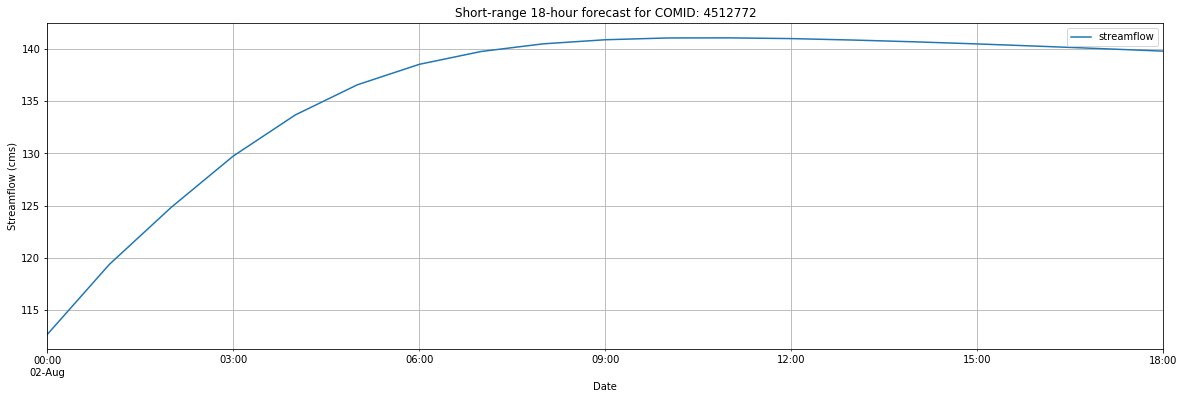

In [8]:
df = sr.get_streamflow(x.assim_time, x.assim_flow, plot=True)

In [9]:
res = get_USGS_rc(comid)
print(res[0])
res[1].head()

There is no rating curve available, please set `get_rc` = False for station 01646502


,INDEP,SHIFT,DEP,INDEP_SHIFT,INDEP_m,SHIFT_m,DEP_cms,INDEP_SHIFT_m
0,2.01,0.0,223.00,2.01,0.612648,0.0,6.314657,0.612648
1,2.02,0.0,226.14,2.02,0.615696,0.0,6.403572,0.615696
2,2.03,0.0,228.00,2.03,0.618744,0.0,6.456241,0.618744
3,2.04,0.0,230.80,2.04,0.621792,0.0,6.535528,0.621792
4,2.05,0.0,233.00,2.05,0.624840,0.0,6.597825,0.624840


In [7]:
mr = MediumRange(fs, comid, date, start_hr)

In [8]:
res = mr.get_NWM_rc()
print(res[0])
res[1].head()

,Stage,Discharge
0,0.0000,0.000000
1,0.3048,30.085741
2,0.6096,96.720480
3,0.9144,180.899337
4,1.2192,323.340296


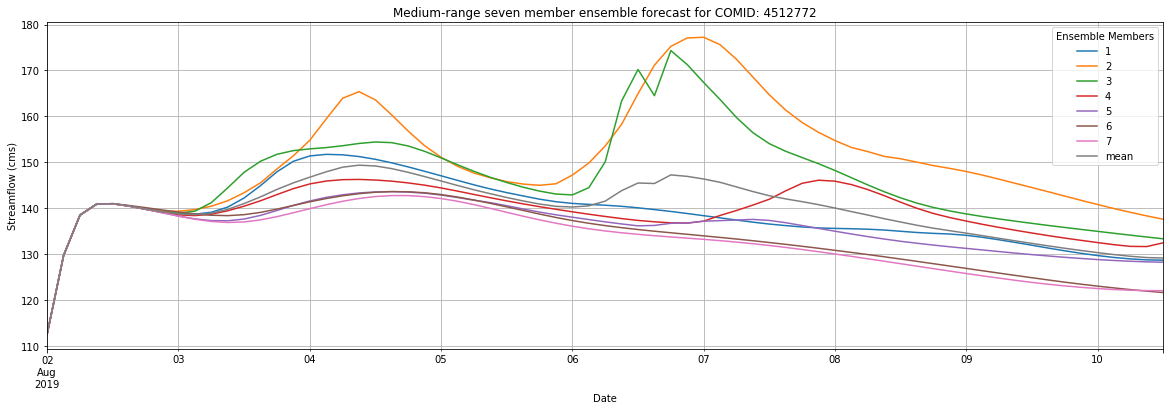

In [9]:
df = mr.get_streamflow(x.assim_time, x.assim_flow, plot=True)

In [10]:
import boto3

In [11]:
s3path = r's3://nwm-datasets/Data/Vector/NWM_V2/hydroprop-fulltable2D.nc'
s3 = boto3.resource('s3')
bucket_name = s3path.split(r"s3://")[1].split(r"/")[0]
key = s3path.split(r"{}/".format(bucket_name))[1]
content_object = s3.Object(bucket_name=bucket_name, key=key)

In [19]:
xr.open_dataset(content_object.get()['Body'])

AttributeError: 'StreamingBody' object has no attribute 'tell'